# Figure 5

## Load packages

In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## Load functions for simulations and plotting

In [2]:
from Golden_Ratio_functions import *

## Figure 5B: Two ensembles & constant gain only

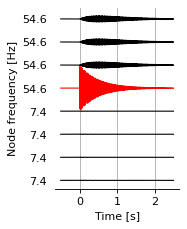

In [3]:
ratio   = np.exp(1)
f_k     = ratio**[2,2,2,2, 4,4,4,4]
network = {"f_k":f_k, "k_perturbed":4}
gain    = {"f_S":0, "g_S":0}

x,t = run_damped_coupled_harmonic_oscillators(network, gain)

f = plt.figure(figsize=(2, 3), dpi=80)
plot_model_traces(t,x,network,gain)
f.savefig("./PDFs/Figure-5B.pdf", bbox_inches='tight')

## Figure 5C: Two ensembles & sinusoidal gain

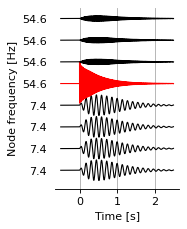

In [4]:
ratio   = np.exp(1)
f_k     = ratio**[2,2,2,2, 4,4,4,4]
network = {"f_k":f_k, "k_perturbed":4}
gain    = {"f_S":ratio**4-ratio**2, "g_S":50}

x,t = run_damped_coupled_harmonic_oscillators(network, gain)

f = plt.figure(figsize=(2, 3), dpi=80)
plot_model_traces(t,x,network,gain)
f.savefig("./PDFs/Figure-5C.pdf", bbox_inches='tight')

## Figure 5D (Part 1): Compute target response versus sinusoidal gain frequency, save it.
This part is slow, and iterates over a range of `f_S`.

In [5]:
ratio     = np.exp(1)
f_k       = ratio**[2,2,2,2, 4,4,4,4]
network   = {"f_k":f_k, "k_perturbed":4}

f_S       = np.arange(1,100,0.1)
g_S       = 50
A         = np.zeros([16,f_S.size])

for i in np.arange(f_S.size):

    print(["%.1f"% f_S[i]][0],end=' ')
    
    gain    = {"f_S":f_S[i], "g_S":g_S}
    x,t = run_damped_coupled_harmonic_oscillators(network, gain)
    
    amp   = np.abs(hilbert(x));
    i0    = np.where( (t>=0) & (t<=1.5) );
    A[:,i]= np.mean(amp[:,i0[0]],1)

res = {"A":A, "f_S":f_S, "g_S":g_S, "f_k":f_k, "network":network, "gain":gain}
io.savemat('Figure-5D.mat', res)


1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.0 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.0 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.0 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.0 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9 10.0 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.0 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.0 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.0 13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.0 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.0 15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.0 16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.0 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.0 18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.0 19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20.0 20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.0 21.1 21.2 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.0 22.1 22.2 22.3 22.4 22.5 22.6 22.7 

## Figure 5D (Part 2): Load target response versus sinusoidal gain frequency, plot it.

This part is fast.

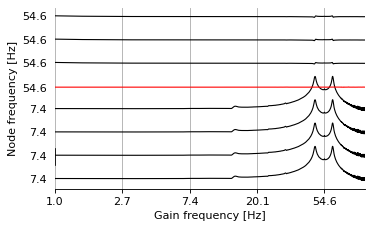

In [3]:
res       = io.loadmat("Figure-5D.mat")
f         = plt.figure(figsize=(5, 3), dpi=80)
ratio     = np.exp(1)
f_k_ticks = ratio**np.arange(0,7+1)
plot_gain_traces_two_groups(res, f_k_ticks)
f.savefig("./PDFs/Figure-5D.pdf", bbox_inches='tight')